In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Final Project by Prissilya Zefanya

This project is for those who consider investing in stocks whether for long and/or short term. This might give those an insight whether the targeted stock is overvalued or not, based on the industry it belongs to.

The data is taken from https://www.idx.co.id/data-pasar/laporan-statistik/statistik/ and selected from IDX Yearly Statistics period of 2016 to 2019, for all listed stocks.

The total of original data are 2409 rows with some nulls data.

In [2]:
df = pd.read_excel ('comp.xlsx')
pd.options.display.float_format = "{:.2f}".format
df.head()

,LISTED_STOCKS,COMPANY,SECTOR,SUBSECTOR,YEAR,DATE,FS_YEAR,ASSETS,LIABILITIES,EQUITY,...,PROFIT_FOR_THE_PERIOD,PROFIT_ATTR_TO_OWNERS_ENTITY,EPS,BOOK_VALUE,PER,PBV,DER,ROA,ROE,NPM
0,BEEF,Estika Tata Tiara Tbk. [S],AGRICULTURE,ANIMAL HUSBANDRY,2019,Sep-19,Dec,886000000000.00,493000000000.00,392000000000,...,46000000000.00,46000000000.00,32.70,208.00,6.18,0.97,1.26,6.95,15.70,6.82
1,BISI,Bisi International Tbk. [S],AGRICULTURE,CROPS,2019,Dec-19,Dec,2941000000000.00,624000000000.00,2317000000000,...,307000000000.00,307000000000.00,102.30,772.00,8.90,1.18,0.27,10.40,13.20,13.50
2,DSFI,Dharma Samudera Fishing Industries Tbk. [S],AGRICULTURE,FISHERY,2019,Sep-19,Dec,374000000000.00,186000000000.00,188000000000,...,6220000000.00,6220000000.00,4.46,101.00,17.00,0.77,0.99,2.22,4.40,2.20
3,AALI,Astra Agro Lestari Tbk. [S],AGRICULTURE,PLANTATION,2019,Dec-19,Dec,26974000000000.00,7996000000000.00,18979000000000,...,244000000000.00,211000000000.00,109.70,9861.00,56.00,0.62,0.42,0.78,1.11,1.21
4,ANDI,Andira Agro Tbk. [S],AGRICULTURE,PLANTATION,2019,Dec-19,Dec,487000000000.00,228000000000.00,259000000000,...,12000000000.00,12000000000.00,1.34,28.00,37.00,1.80,0.88,2.56,4.82,4.01


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409 entries, 0 to 2408
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LISTED_STOCKS                 2409 non-null   object 
 1   COMPANY                       2409 non-null   object 
 2   SECTOR                        2409 non-null   object 
 3   SUBSECTOR                     2409 non-null   object 
 4   YEAR                          2409 non-null   int64  
 5   DATE                          2409 non-null   object 
 6   FS_YEAR                       2409 non-null   object 
 7   ASSETS                        2409 non-null   float64
 8   LIABILITIES                   2409 non-null   float64
 9   EQUITY                        2409 non-null   int64  
 10  SALES                         2388 non-null   float64
 11  EBT                           2408 non-null   float64
 12  PROFIT_FOR_THE_PERIOD         2409 non-null   float64
 13  PRO

### Categorizing Stocks Value

Based on https://www.investopedia.com/articles/investing/101316/how-tell-if-stock-overvalued-or-undervalued.asp, Stock ratio analysis can provide a quick look at the reasonability of a stock’s price, as well as its likelihood of being overvalued or not. The most popular ratio as a benchmark is Price to Earning Ratio (P/E Ratio).

We calculated the average of P/E Ratio per Industry (Sector) that have been provided by the data. If the listed stock's P/E Ratio is higher than the average P/E Ratio in the industry, it will be categorized as overvalued. Other than that, it will be categorized as not-overvalued.

Below, we took 0 as not-overvalued and 1 as overvalued.

In [4]:
df['Avg'] = np.nan

In [5]:
df['Avg'] = df['Avg'].fillna(df.groupby(['SECTOR'])['PER'].transform('mean'))

In [6]:
y = []
for i, j in zip(df['PER'], df['Avg']):
    if i > j:
        y.append(1)
    elif i < j:
        y.append(0)
    else:
        y.append('Equal')
df['Category'] = y

### Columns Brief Summary

Below is the brief summary per column to picture the contents of the data

In [7]:
np.random.seed(101)
kol1 = df.columns
kol2 = df.dtypes
kol3 = df.isnull().sum()
kol4 = np.around((kol3/df['LISTED_STOCKS'].count())*100,decimals=2)
kol5 = df.nunique()
kol6 = []
for i in range(len(df.columns)):
    x = df[df.columns[i]].unique()
    y = np.random.randint(1,len(x),2)
    z = x[[y]]
    kol6.append(z)
df_info = pd.DataFrame({'dataFeatures':kol1,'dataType':kol2,'null':kol3,'nullPct':kol4,'unique':kol5,'uniqueSample':kol6})
df_info.reset_index(drop = True, inplace = True)
df_info

C:\Users\priss\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()


,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,LISTED_STOCKS,object,0,0.00,716,"[FORU, GEMS]"
1,COMPANY,object,0,0.00,1055,"[Northcliff Citranusa Indonesia Tbk. [S], Berl..."
2,SECTOR,object,0,0.00,9,"[TRADE, SERVICES & INVESTMENT, CONSUMER GOODS ..."
3,SUBSECTOR,object,0,0.00,49,"[FOOD AND BEVERAGES, COMPUTER AND SERVICES]"
4,YEAR,int64,0,0.00,4,"[2018, 2018]"
5,DATE,object,0,0.00,27,"[Oct-17, Dec-19]"
6,FS_YEAR,object,0,0.00,5,"[Jan, Mar]"
7,ASSETS,float64,0,0.00,2070,"[1159000000000.0, 6756000000000.0]"
8,LIABILITIES,float64,0,0.00,1849,"[3225000000000.0, 89000000000.0]"
9,EQUITY,int64,0,0.00,1862,"[3949000000000, 2490000000000]"


### Numeric Data Description

To describe the numeric data, below is the summary. There are several companies that have negative value in several features. It might happen since the economic itself is dynamic.

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YEAR,2409.00,2017.61,1.12,2016.00,2017.00,2018.00,2019.00,2019.00
ASSETS,2409.00,18387239755085.10,86841801743605.33,2630000000.00,747000000000.00,2450000000000.00,8590000000000.00,1416759000000000.00
LIABILITIES,2409.00,12908291018679.95,70743410148470.42,128000000.00,290000000000.00,1135000000000.00,4567000000000.00,1183156000000000.00
EQUITY,2409.00,5242231726857.62,16532336961620.58,-37416000000000.00,318000000000.00,1129000000000.00,3913000000000.00,209035000000000.00
SALES,2388.00,6003769087520.94,17862073472774.97,-6088000000000.00,233750000000.00,1083500000000.00,3947750000000.00,333007000000000.00
EBT,2408.00,797682908222.59,3758939071593.49,-8634000000000.00,757500000.00,51000000000.00,341500000000.00,64304000000000.00
PROFIT_FOR_THE_PERIOD,2409.00,571189137401.41,2683514945257.85,-6483000000000.00,140000000.00,38000000000.00,266000000000.00,34414000000000.00
PROFIT_ATTR_TO_OWNERS_ENTITY,2409.00,554382844748.86,2686131658621.62,-6483000000000.00,20000000.00,35000000000.00,254000000000.00,52484000000000.00
EPS,2409.00,254.51,3993.44,-2394.00,0.00,15.00,72.40,169954.00
BOOK_VALUE,2409.00,1629.67,11244.69,-5415.00,140.00,330.00,1012.00,365051.00


In [9]:
df[(df['EQUITY']==-37416000000000.00) |
   (df['SALES']==-6088000000000.00) |
   (df['EBT']==-8634000000000.00) |
  (df['PROFIT_FOR_THE_PERIOD']==-6483000000000.00) |
  (df['PROFIT_ATTR_TO_OWNERS_ENTITY']==-6483000000000.00)][['LISTED_STOCKS', 'COMPANY', 'SECTOR', 'SUBSECTOR', 'YEAR', 'ASSETS', 'LIABILITIES', 'EQUITY', 'SALES', 'EBT' , 'PROFIT_FOR_THE_PERIOD', 'PROFIT_ATTR_TO_OWNERS_ENTITY']]

,LISTED_STOCKS,COMPANY,SECTOR,SUBSECTOR,YEAR,ASSETS,LIABILITIES,EQUITY,SALES,EBT,PROFIT_FOR_THE_PERIOD,PROFIT_ATTR_TO_OWNERS_ENTITY
1209,SRTG,Saratoga Investama Sedaya Tbk. [S],"TRADE, SERVICES & INVESTMENT",INVESTMENT COMPANY,2018,20115000000000.00,4151000000000.00,15964000000000,-6088000000000.00,-6685000000000.00,-6135000000000.00,6195000000000.00
2019,BNLI,Bank Permata Tbk.,FINANCE,BANK,2016,165528000000000.00,146238000000000.00,19290000000000,16719000000000.00,-8634000000000.00,-6483000000000.00,-6483000000000.00
2144,BUMI,Bumi Resources Tbk. **),MINING,COAL MINING,2016,41681000000000.00,79097000000000.00,-37416000000000,314000000000.00,-126000000000.00,1616000000000.00,910000000000.00


In [10]:
df[(df['ASSETS']==1416759000000000.00) |
   (df['LIABILITIES']==1183156000000000.00) |
   (df['EQUITY']==209035000000000.00) |
   (df['SALES']==333007000000000.00) |
   (df['EBT']==64304000000000.00) |
  (df['PROFIT_FOR_THE_PERIOD']==34414000000000.00) |
  (df['PROFIT_ATTR_TO_OWNERS_ENTITY']==52484000000000.00)][['LISTED_STOCKS', 'COMPANY', 'SECTOR', 'SUBSECTOR', 'YEAR', 'ASSETS', 'LIABILITIES', 'EQUITY', 'SALES', 'EBT' , 'PROFIT_FOR_THE_PERIOD', 'PROFIT_ATTR_TO_OWNERS_ENTITY']]

,LISTED_STOCKS,COMPANY,SECTOR,SUBSECTOR,YEAR,ASSETS,LIABILITIES,EQUITY,SALES,EBT,PROFIT_FOR_THE_PERIOD,PROFIT_ATTR_TO_OWNERS_ENTITY
168,BBRI,Bank Rakyat Indonesia (Persero) Tbk.,FINANCE,BANK,2019,1416759000000000.00,1183156000000000.00,208784000000000,155569000000000.00,43364000000000.00,34414000000000.00,34373000000000.00
180,BMRI,Bank Mandiri (Persero) Tbk.,FINANCE,BANK,2019,1318246000000000.00,1025750000000000.00,209035000000000,129129000000000.00,36441000000000.00,28456000000000.00,27482000000000.00
216,VRNA,Verena Multi Finance Tbk.,FINANCE,FINANCIAL INSTITUTION,2019,2653000000000.00,1984000000000.00,669000000000,333007000000000.00,3810000000.00,1770000000.00,1770000000.00
1041,MDKA,Merdeka Copper Gold Tbk. [S],MINING,METAL AND MINERAL MINING,2018,11602000000000.00,5463000000000.00,6139000000000,4274000000000.00,1262000000000.00,842000000000.00,52484000000000.00
1430,PSDN,Prasidha Aneka Niaga Tbk. [S],CONSUMER GOODS INDUSTRY,FOOD AND BEVERAGES,2017,684000000000.00,360000000000.00,324000000000,1097000000000.00,64304000000000.00,51000000000.00,39000000000.00


### EDA

To simplify the EDA, we drop the features that might not have any contributions in the analysis. And we simply drop the nulls data since it will not have a high impact in the analysis.

We are now having 2273 rows in the data.

In [11]:
new_df = df.drop(['LISTED_STOCKS', 'COMPANY', 'SUBSECTOR', 'DATE', 'FS_YEAR', 'Avg'], axis = 1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409 entries, 0 to 2408
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SECTOR                        2409 non-null   object 
 1   YEAR                          2409 non-null   int64  
 2   ASSETS                        2409 non-null   float64
 3   LIABILITIES                   2409 non-null   float64
 4   EQUITY                        2409 non-null   int64  
 5   SALES                         2388 non-null   float64
 6   EBT                           2408 non-null   float64
 7   PROFIT_FOR_THE_PERIOD         2409 non-null   float64
 8   PROFIT_ATTR_TO_OWNERS_ENTITY  2409 non-null   float64
 9   EPS                           2409 non-null   float64
 10  BOOK_VALUE                    2409 non-null   float64
 11  PER                           2409 non-null   float64
 12  PBV                           2409 non-null   float64
 13  DER

In [12]:
new_df.dropna(axis = 0, inplace = True)

In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2273 entries, 0 to 2408
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SECTOR                        2273 non-null   object 
 1   YEAR                          2273 non-null   int64  
 2   ASSETS                        2273 non-null   float64
 3   LIABILITIES                   2273 non-null   float64
 4   EQUITY                        2273 non-null   int64  
 5   SALES                         2273 non-null   float64
 6   EBT                           2273 non-null   float64
 7   PROFIT_FOR_THE_PERIOD         2273 non-null   float64
 8   PROFIT_ATTR_TO_OWNERS_ENTITY  2273 non-null   float64
 9   EPS                           2273 non-null   float64
 10  BOOK_VALUE                    2273 non-null   float64
 11  PER                           2273 non-null   float64
 12  PBV                           2273 non-null   float64
 13  DER

### Listed Stocks in Yearly Bases

From the plot below, we could see that the most listed stocks are in 'TRADE, SERVICE & INVESTMENT' sector in all periods.

And for the stocks value, most of them are not-overvalued in all periods.

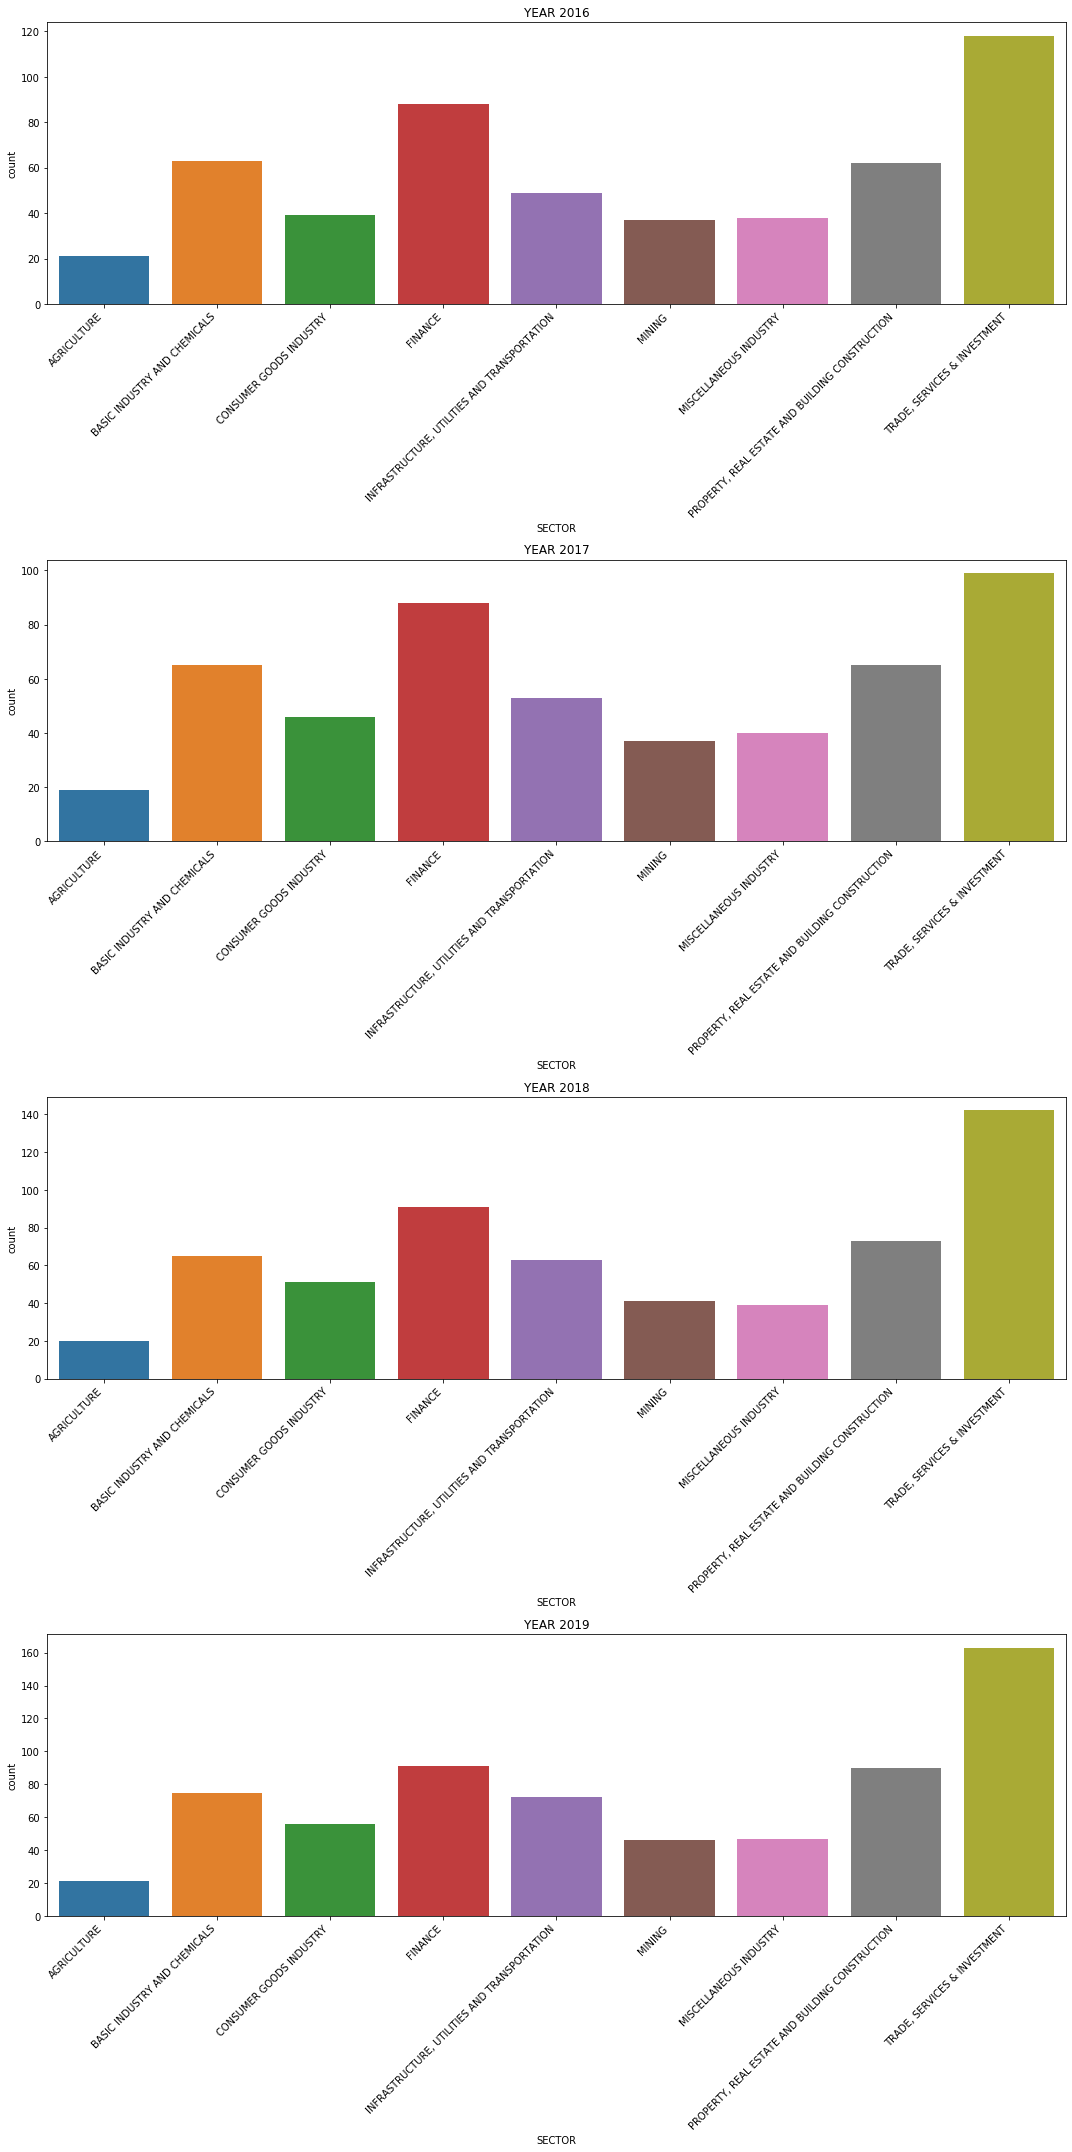

In [14]:
plt.figure(figsize = (15,30))
plt.subplot(4,1,1)
chart = sns.countplot(new_df[new_df['YEAR']==2016]['SECTOR'])
chart.set_title('YEAR 2016')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.subplot(4,1,2)
chart = sns.countplot(new_df[new_df['YEAR']==2017]['SECTOR'])
chart.set_title('YEAR 2017')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.subplot(4,1,3)
chart = sns.countplot(new_df[new_df['YEAR']==2018]['SECTOR'])
chart.set_title('YEAR 2018')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.subplot(4,1,4)
chart = sns.countplot(new_df[new_df['YEAR']==2019]['SECTOR'])
chart.set_title('YEAR 2019')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()

C:\Users\priss\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


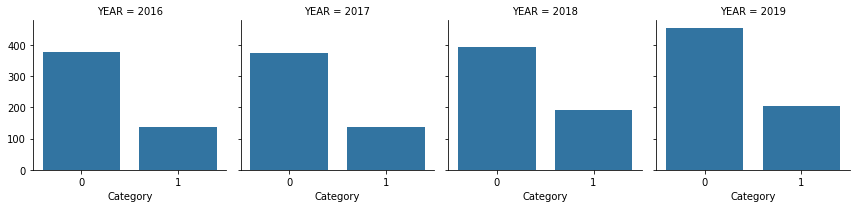

In [15]:
g = sns.FacetGrid(new_df, col = 'YEAR')
g.map(sns.countplot, 'Category')

### Correlation to The Category

Based on Spearman Correlation, the highest correlation to the category is P/E Ratio as we expected. But we still hesitate to choose which features that could contribute the best in the valuation analysis, so we still keep all the features for the next steps.

In [16]:
from scipy.stats import spearmanr

corr = []
for i in new_df.drop(['SECTOR', 'YEAR', 'Category'], axis = 1).columns:
    corr.append(spearmanr(new_df[i], new_df['Category'])[0])

col = new_df.drop(['SECTOR', 'YEAR', 'Category'], axis = 1).columns.tolist()

kstest = pd.DataFrame(corr, columns = ['Spearmanr_Correlation'], index = col)
kstest

,Spearmanr_Correlation
ASSETS,-0.06
LIABILITIES,-0.07
EQUITY,-0.04
SALES,0.01
EBT,0.07
PROFIT_FOR_THE_PERIOD,0.07
PROFIT_ATTR_TO_OWNERS_ENTITY,0.06
EPS,0.03
BOOK_VALUE,-0.10
PER,0.54


### Data Distribution

If we could see the KDE plot, there is no feature that has a normal distribution data.

So we try to check with KSTest and found that the KDE plot has described correctly.

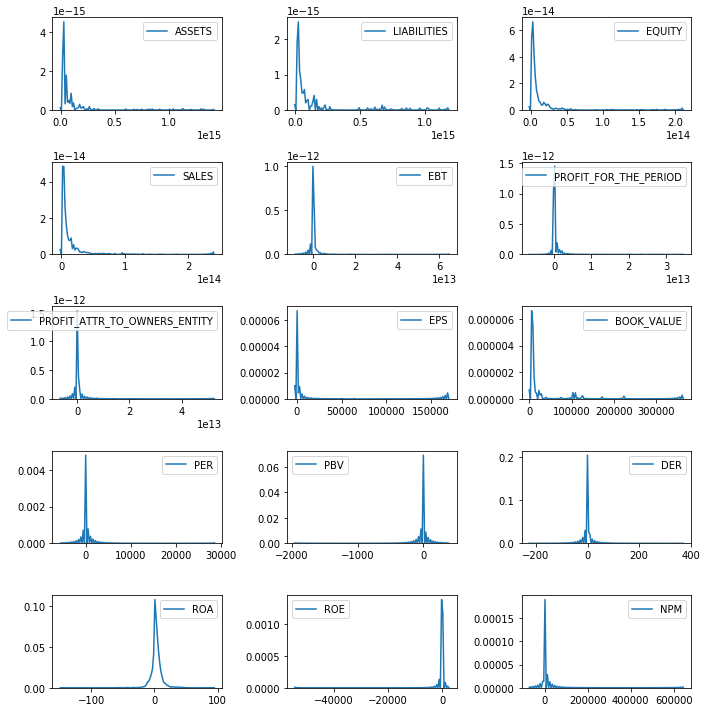

In [17]:
plt.figure(figsize=(10,10))
plt.subplot(5,3,1)
sns.kdeplot(new_df['ASSETS'])
plt.subplot(5,3,2)
sns.kdeplot(new_df['LIABILITIES'])
plt.subplot(5,3,3)
sns.kdeplot(new_df['EQUITY'])
plt.subplot(5,3,4)
sns.kdeplot(new_df['SALES'])
plt.subplot(5,3,5)
sns.kdeplot(new_df['EBT'])
plt.subplot(5,3,6)
sns.kdeplot(new_df['PROFIT_FOR_THE_PERIOD'])
plt.subplot(5,3,7)
sns.kdeplot(new_df['PROFIT_ATTR_TO_OWNERS_ENTITY'])
plt.subplot(5,3,8)
sns.kdeplot(new_df['EPS'])
plt.subplot(5,3,9)
sns.kdeplot(new_df['BOOK_VALUE'])
plt.subplot(5,3,10)
sns.kdeplot(new_df['PER'])
plt.subplot(5,3,11)
sns.kdeplot(new_df['PBV'])
plt.subplot(5,3,12)
sns.kdeplot(new_df['DER'])
plt.subplot(5,3,13)
sns.kdeplot(new_df['ROA'])
plt.subplot(5,3,14)
sns.kdeplot(new_df['ROE'])
plt.subplot(5,3,15)
sns.kdeplot(new_df['NPM'])
plt.tight_layout()

In [18]:
from scipy.stats import kstest

ks = []
for i in new_df.drop(['SECTOR', 'YEAR', 'Category'], axis = 1).columns:
    ks.append(kstest(new_df[i], 'norm')[1])

col = new_df.drop(['SECTOR', 'YEAR', 'Category'], axis = 1).columns.tolist()

kstest = pd.DataFrame(ks, columns = ['kstest'], index = col)
kstest

,kstest
ASSETS,0.00
LIABILITIES,0.00
EQUITY,0.00
SALES,0.00
EBT,0.00
PROFIT_FOR_THE_PERIOD,0.00
PROFIT_ATTR_TO_OWNERS_ENTITY,0.00
EPS,0.00
BOOK_VALUE,0.00
PER,0.00


### Outliers

From the boxplot, we could see so many outliers. But we decide to keep as it is because those are what we would find in any financial data.

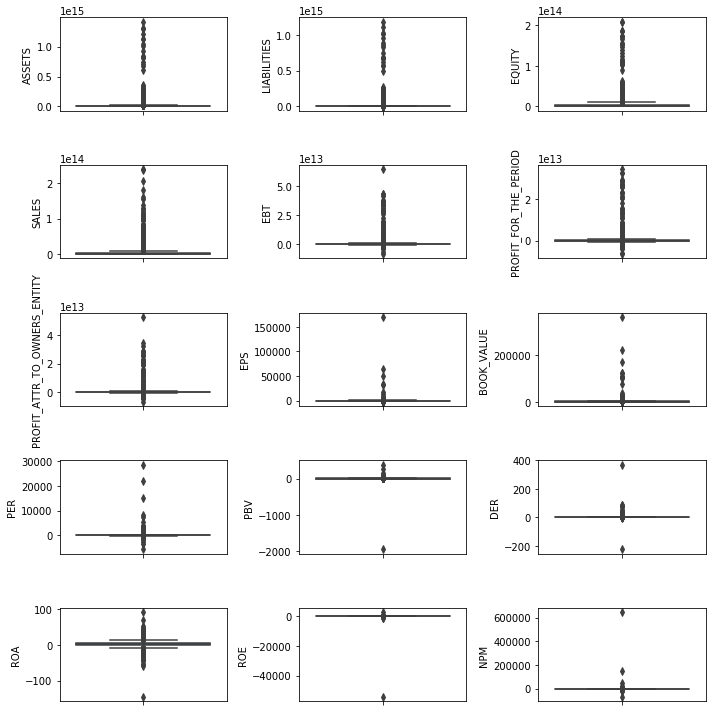

In [19]:
plt.figure(figsize=(10,10))
plt.subplot(5,3,1)
sns.boxplot(new_df['ASSETS'], orient = 'v')
plt.subplot(5,3,2)
sns.boxplot(new_df['LIABILITIES'], orient = 'v')
plt.subplot(5,3,3)
sns.boxplot(new_df['EQUITY'], orient = 'v')
plt.subplot(5,3,4)
sns.boxplot(new_df['SALES'], orient = 'v')
plt.subplot(5,3,5)
sns.boxplot(new_df['EBT'], orient = 'v')
plt.subplot(5,3,6)
sns.boxplot(new_df['PROFIT_FOR_THE_PERIOD'], orient = 'v')
plt.subplot(5,3,7)
sns.boxplot(new_df['PROFIT_ATTR_TO_OWNERS_ENTITY'], orient = 'v')
plt.subplot(5,3,8)
sns.boxplot(new_df['EPS'], orient = 'v')
plt.subplot(5,3,9)
sns.boxplot(new_df['BOOK_VALUE'], orient = 'v')
plt.subplot(5,3,10)
sns.boxplot(new_df['PER'], orient = 'v')
plt.subplot(5,3,11)
sns.boxplot(new_df['PBV'], orient = 'v')
plt.subplot(5,3,12)
sns.boxplot(new_df['DER'], orient = 'v')
plt.subplot(5,3,13)
sns.boxplot(new_df['ROA'], orient = 'v')
plt.subplot(5,3,14)
sns.boxplot(new_df['ROE'], orient = 'v')
plt.subplot(5,3,15)
sns.boxplot(new_df['NPM'], orient = 'v')
plt.tight_layout()

### Encoding Categorical Feature

Since we still keep several categorical features, we need to encode to analyze with the models.

There are 3 categorical features:
* Sector (we keep and encode this since we averaged the P/E Ratio based on the sector)
* Year (we drop this since we do not need it)
* Category (we have categorized with numbers in the first place)

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sector = le.fit_transform(new_df['SECTOR'])
new_df['SectorCode'] = sector

### Features Selection

Since we have not done anything on the features selection from the correlation data, we use OLS to find out what features contribute the best for the 'Category'.

In [21]:
from sklearn.model_selection import train_test_split
x = new_df.drop(['SECTOR', 'YEAR', 'Category'], axis = 1)
y = new_df['Category']

In [22]:
import statsmodels.api as sm
from statsmodels.api import OLS
ols = OLS(y, sm.add_constant(x))
hasil = ols.fit()
hasil.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Category   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     24.62
Date:                Wed, 30 Sep 2020   Prob (F-statistic):           6.22e-64
Time:                        20:06:05   Log-Likelihood:                -1268.8
No. Observations:                2273   AIC:                             2570.
Df Residuals:                    2257   BIC:                             2661.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0479      0.020      2.387      0.017       0.009       0.087
ASSETS                        3.251e-15   3.79e-15      0.857      0.392   -4.19e-15    1.07e-14
LIABILITIES                  -2.998e-15   3.92e-15     -0.765      0.444   -1.07e-14    4.69e-15
EQUITY                       -6.184e-15   4.42e-15     -1.398      0.162   -1.49e-14    2.49e-15
SALES                         3.618e-15    1.2e-15      3.018      0.003    1.27e-15    5.97e-15
EBT                           6.999e-15   5.78e-15      1.212      0.226   -4.33e-15    1.83e-14
PROFIT_FOR_THE_PERIOD        -3.746e-14   1.34e-14     -2.796      0.005   -6.37e-14   -1.12e-14
PROFIT_ATTR_TO_OWNERS_ENTITY  9.662e-15   7.99e-15      1.209      0.227   -6.01e-15    2.53e-14
EPS                            3.01e-06   3.55e-06      0.848      0.397   -3.95e-06    9.97e-06
BOOK_VALUE                   -2.915e-06   1.26e-06     -2.322      0.020   -5.38e-06   -4.54e-07
PER                           7.966e-05   9.64e-06      8.266      0.000    6.08e-05    9.86e-05
PBV                              0.0005      0.000      1.533      0.125      -0.000       0.001
DER                             -0.0036      0.002     -1.723      0.085      -0.008       0.001
ROA                              0.0076      0.001      6.483      0.000       0.005       0.010
ROE                          -3.737e-05   1.54e-05     -2.421      0.016   -6.76e-05   -7.11e-06
NPM                          -8.096e-07    6.4e-07     -1.266      0.206   -2.06e-06    4.45e-07
SectorCode                       0.0489      0.003     14.207      0.000       0.042       0.056
==============================================================================
Omnibus:                      362.001   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              265.135
Skew:                           0.733   Prob(JB):                     2.67e-58
Kurtosis:                       2.192   Cond. No.                     2.71e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Train_Test_Split

From the OLS, we could find that only Sales, Profit For The Period, Book Value, PER, ROA, ROE and Sector Code that have good contributions for the 'Category'.

So we select those features for the models.

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x[['SALES', 'PROFIT_FOR_THE_PERIOD', 'BOOK_VALUE', 'PER', 'ROA', 'ROE', 'SectorCode']], y, test_size = 0.30, random_state = 101)
ytrain.value_counts()

0    1115
1     476
Name: Category, dtype: int64

### Oversampling Method

Since the value counts of the ytrain are not balance, we use oversampling method to reduce the bias in the models.

In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 101)
oversampled_xtrain, oversampled_ytrain = smote.fit_sample(xtrain, ytrain)

In [25]:
oversampled_ytrain.value_counts()

1    1115
0    1115
Name: Category, dtype: int64

### Tree Based Classifier

As we keep the outliers as it is, we choose tree based classifier for the modeling since it robust even with the outliers.

#### Random Forest Classifier

The accuracy result is 95% with recall 94% and 98%.

In [26]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(oversampled_xtrain, oversampled_ytrain)

RandomForestClassifier()

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
print(classification_report(ytest, random_forest.predict(xtest)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       487
           1       0.89      0.99      0.93       195

    accuracy                           0.96       682
   macro avg       0.94      0.97      0.95       682
weighted avg       0.96      0.96      0.96       682



In [68]:
tnrfc, fprfc, fnrfc, tprfc = confusion_matrix(ytest, random_forest.predict(xtest)).ravel()

#### Random Forest Classifier with Tuning

We tried to tune the parameter to get the optimal result.

The accuracy score increase to 96% with recall 95% and 98%.

In [347]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
search = GridSearchCV(estimator = rf,
                   param_grid = 
                   {'n_estimators' : [100,200,300,400,500],
                   'bootstrap': [True,False],
                   'min_samples_split': [10,20,30,40,50]},
                   scoring = 'accuracy',
                   cv = 5,
                   n_jobs = -1)
search.fit(oversampled_xtrain, oversampled_ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'min_samples_split': [10, 20, 30, 40, 50],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [348]:
search.best_params_

{'bootstrap': False, 'min_samples_split': 10, 'n_estimators': 400}

In [28]:
best_rf = RandomForestClassifier(bootstrap= False, min_samples_split= 10, n_estimators= 400)
best_rf.fit(oversampled_xtrain, oversampled_ytrain)

RandomForestClassifier(bootstrap=False, min_samples_split=10, n_estimators=400)

In [29]:
print(classification_report(ytest, best_rf.predict(xtest)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       487
           1       0.89      0.99      0.94       195

    accuracy                           0.96       682
   macro avg       0.94      0.97      0.96       682
weighted avg       0.97      0.96      0.96       682



In [58]:
tnrfct, fprfct, fnrfct, tprfct = confusion_matrix(ytest, best_rf.predict(xtest)).ravel()

#### Decision Tree Classifier

With Decision Tree Classifier, we got 95% accuracy score with recall 94% and 97%.

In [30]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion = 'entropy')
decision_tree.fit(oversampled_xtrain, oversampled_ytrain)

DecisionTreeClassifier(criterion='entropy')

In [31]:
print(classification_report(ytest, decision_tree.predict(xtest)))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       487
           1       0.86      0.97      0.91       195

    accuracy                           0.95       682
   macro avg       0.92      0.95      0.94       682
weighted avg       0.95      0.95      0.95       682



In [59]:
tndt, fpdt, fndt, tpdt = confusion_matrix(ytest, decision_tree.predict(xtest)).ravel()

#### Auto Machine Learning (TPOT Classifier)

Then we tried with TPOT Classifier and got the best pipeline of "GradientBoostingClassifier(BernoulliNB(input_matrix, alpha=10.0, fit_prior=True), learning_rate=0.5, max_depth=10, max_features=0.8, min_samples_leaf=11, min_samples_split=15, n_estimators=100, subsample=1.0)".

The accuracy score is 95% with recall 94% and 98%.

In [355]:
from tpot import TPOTClassifier
tpot = TPOTClassifier(subsample = 0.7, verbosity = 2, warm_start = True, generations = 5)
tpot.fit(oversampled_xtrain, oversampled_ytrain)


Generation 1 - Current best internal CV score: 0.952592774637503
Generation 2 - Current best internal CV score: 0.952592774637503
Generation 3 - Current best internal CV score: 0.9551507331858771
Generation 4 - Current best internal CV score: 0.9551507331858771
Generation 5 - Current best internal CV score: 0.9564348324731711
Best pipeline: GradientBoostingClassifier(BernoulliNB(input_matrix, alpha=10.0, fit_prior=True), learning_rate=0.5, max_depth=10, max_features=0.8, min_samples_leaf=11, min_samples_split=15, n_estimators=100, subsample=1.0)


TPOTClassifier(generations=5,
               log_file=<ipykernel.iostream.OutStream object at 0x0000019E2AB0B908>,
               subsample=0.7, verbosity=2, warm_start=True)

In [356]:
print(classification_report(ytest, tpot.predict(xtest)))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       487
           1       0.87      0.98      0.93       195

    accuracy                           0.95       682
   macro avg       0.93      0.96      0.95       682
weighted avg       0.96      0.95      0.96       682



#### Best Pipeline from TPOT Classifier

When we tried to include the BernoulliNB, the model got error then we dropped it and only used "GradientBoostingClassifier(learning_rate=0.5, max_depth=10, max_features=0.8, min_samples_leaf=11, min_samples_split=15, n_estimators=100, subsample=1.0)".

We found this as the highest accuracy score so far and got 97% with recall 96% and 98%.

In [32]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
best_tpot = GradientBoostingClassifier(learning_rate=0.5, max_depth=10, max_features=0.8, min_samples_leaf=11, min_samples_split=15, n_estimators=100, subsample=1.0)
best_tpot.fit(oversampled_xtrain, oversampled_ytrain)

GradientBoostingClassifier(learning_rate=0.5, max_depth=10, max_features=0.8,
                           min_samples_leaf=11, min_samples_split=15)

In [33]:
print(classification_report(ytest, best_tpot.predict(xtest)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       487
           1       0.92      0.98      0.95       195

    accuracy                           0.97       682
   macro avg       0.96      0.98      0.97       682
weighted avg       0.97      0.97      0.97       682



In [60]:
tntpot, fptpot, fntpot, tptpot = confusion_matrix(ytest, best_tpot.predict(xtest)).ravel()

In [66]:
CM = pd.DataFrame(confusion_matrix(ytest, best_tpot.predict(xtest)), columns = ['Not Overvalued Prediction','Overvalued Prediction'], index = ['Not Overvalued Actual','Overvalued Actual'])
CM

,Not Overvalued Prediction,Overvalued Prediction
Not Overvalued Actual,471,16
Overvalued Actual,3,192


#### Ada Boost Classifier (Base Estimator : Decision Tree Classifier)

With Ada Boost Classifier, we got 95% of accuracy score with recall 95% and 96%.

In [360]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

decision_tree = DecisionTreeClassifier()
ada_boost = AdaBoostClassifier (base_estimator = decision_tree)

param = {'base_estimator__min_samples_split': [i for i in range (1, 5)],
        'base_estimator__min_samples_leaf': [i for i in range (1, 5)],
        'n_estimators': [10,20,40,50],
        'learning_rate': np.linspace(0.01, 0.1, 5)}
search = GridSearchCV (estimator = ada_boost, param_grid = param, scoring = 'roc_auc', cv = 5)
search.fit(oversampled_xtrain, oversampled_ytrain)

C:\Users\priss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\priss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\priss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\priss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\priss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\priss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\priss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\priss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\priss\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'base_estimator__min_samples_leaf': [1, 2, 3, 4],
                         'base_estimator__min_samples_split': [1, 2, 3, 4],
                         'learning_rate': array([0.01  , 0.0325, 0.055 , 0.0775, 0.1   ]),
                         'n_estimators': [10, 20, 40, 50]},
             scoring='roc_auc')

In [361]:
search.best_params_

{'base_estimator__min_samples_leaf': 2,
 'base_estimator__min_samples_split': 2,
 'learning_rate': 0.05500000000000001,
 'n_estimators': 40}

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
dt = DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=4)
ab = AdaBoostClassifier(base_estimator = dt, n_estimators = 40, learning_rate = 0.05500000000000001, algorithm = 'SAMME')
dt.fit(oversampled_xtrain, oversampled_ytrain)
ab.fit(oversampled_xtrain, oversampled_ytrain)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(min_samples_leaf=2,
                                                         min_samples_split=4),
                   learning_rate=0.05500000000000001, n_estimators=40)

In [36]:
print(classification_report(ytest, ab.predict(xtest)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       487
           1       0.90      0.96      0.93       195

    accuracy                           0.96       682
   macro avg       0.94      0.96      0.95       682
weighted avg       0.96      0.96      0.96       682



In [61]:
tnab, fpab, fnab, tpab = confusion_matrix(ytest, ab.predict(xtest)).ravel()

#### XGBClassifier

And our last trial of model was with XGB Classifier and got 95% of accuracy score with recall 95% and 97%.

In [37]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate = 0.01, n_estimators = 100)
xgb.fit(oversampled_xtrain, oversampled_ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
print(classification_report(ytest, xgb.predict(xtest)))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       487
           1       0.88      0.97      0.92       195

    accuracy                           0.95       682
   macro avg       0.94      0.96      0.95       682
weighted avg       0.96      0.95      0.96       682



In [63]:
tnxgb, fpxgb, fnxgb, tpxgb = confusion_matrix(ytest, xgb.predict(xtest)).ravel()

In [69]:
modelComparation = pd.DataFrame({
    "RandomForest": [accuracy_score(ytest, random_forest.predict(xtest)),precision_score(ytest, random_forest.predict(xtest)),recall_score(ytest, random_forest.predict(xtest)),f1_score(ytest, random_forest.predict(xtest)),tnrfc, fprfc, fnrfc, tprfc],
    "RandomForest with Tuning": [accuracy_score(ytest, best_rf.predict(xtest)),precision_score(ytest, best_rf.predict(xtest)),recall_score(ytest, best_rf.predict(xtest)),f1_score(ytest, best_rf.predict(xtest)),tnrfct, fprfct, fnrfct, tprfct],
    "DecissionTree": [accuracy_score(ytest, decision_tree.predict(xtest)),precision_score(ytest, decision_tree.predict(xtest)),recall_score(ytest, decision_tree.predict(xtest)),f1_score(ytest, decision_tree.predict(xtest)),tndt, fpdt, fndt, tpdt],
    "GradientBoosting": [accuracy_score(ytest, best_tpot.predict(xtest)),precision_score(ytest, best_tpot.predict(xtest)),recall_score(ytest, best_tpot.predict(xtest)),f1_score(ytest, best_tpot.predict(xtest)),tntpot, fptpot, fntpot, tptpot],
    "AdaBoost": [accuracy_score(ytest, ab.predict(xtest)),precision_score(ytest, ab.predict(xtest)),recall_score(ytest, ab.predict(xtest)),f1_score(ytest, ab.predict(xtest)),tnab, fpab, fnab, tpab],
    "XGB": [accuracy_score(ytest, xgb.predict(xtest)),precision_score(ytest, xgb.predict(xtest)),recall_score(ytest, xgb.predict(xtest)),f1_score(ytest, xgb.predict(xtest)),tnxgb, fpxgb, fnxgb, tpxgb],
}, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', '0 Accurately Predicted', '0 False Predicted', '1 False Predicted', '1 Accurately Predicted'])
modelComparation

,RandomForest,RandomForest with Tuning,DecissionTree,GradientBoosting,AdaBoost,XGB
Accuracy Score,0.96,0.96,0.95,0.97,0.96,0.95
Precision Score,0.89,0.89,0.86,0.92,0.90,0.88
Recall Score,0.99,0.99,0.97,0.98,0.96,0.97
F1 Score,0.93,0.94,0.91,0.95,0.93,0.92
0 Accurately Predicted,462.00,464.00,456.00,471.00,467.00,462.00
0 False Predicted,25.00,23.00,31.00,16.00,20.00,25.00
1 False Predicted,2.00,2.00,6.00,3.00,7.00,6.00
1 Accurately Predicted,193.00,193.00,189.00,192.00,188.00,189.00


### Joblib

We decided to use the model recommended by TPOT Classifier and test with new data as follows.

Then we create the joblib to be used for Flask.

In [41]:
data = [1000000000,300000000,1000,3.5,0.5,0.3,2]
col = ['SALES', 'PROFIT_FOR_THE_PERIOD', 'BOOK_VALUE', 'PER', 'ROA', 'ROE', 'SectorCode']
new_data = pd.DataFrame(data, index = col).transpose()
# best_tpot.predict(new_data)

best_tpot.predict(pd.DataFrame([1000000000,300000000,1000,3.5,0.5,0.3,2]).transpose())[0]

0

In [34]:
from joblib import dump, load
dump(best_tpot, 'best_tpot.joblib')

['best_tpot.joblib']

### Sector Code

We record the code for Sector feature to be used for Flask.

In [375]:
idx = np.array(new_df['SectorCode'].unique())
data = np.array(new_df['SECTOR'].unique())
code = pd.DataFrame({'Code' : idx, 'Sector' : data}, index = np.arange(0,9))
code

,Code,Sector
0,0,AGRICULTURE
1,1,BASIC INDUSTRY AND CHEMICALS
2,2,CONSUMER GOODS INDUSTRY
3,3,FINANCE
4,4,"INFRASTRUCTURE, UTILITIES AND TRANSPORTATION"
5,5,MINING
6,6,MISCELLANEOUS INDUSTRY
7,7,"PROPERTY, REAL ESTATE AND BUILDING CONSTRUCTION"
8,8,"TRADE, SERVICES & INVESTMENT"


### Saved File

We saved a file for being used in Flask to visualize the data.

In [ ]:
save = df.dropna(axis = 0)
save.drop('Avg', axis = 1, inplace = True)

In [ ]:
x = []
for i in save['Category']:
    if i == 0:
        x.append('Not Overvalued')
    else:
        x.append('Overvalued')
save['Category'] = x

y = []
for j in save['YEAR']:
    if j == 2016:
        y.append('Year 2016')
    elif j == 2017:
        y.append('Year 2017')
    elif j == 2018:
        y.append('Year 2018')
    elif j == 2019:
        y.append('Year 2019')
save['YEAR'] = y

In [ ]:
save.to_csv('idx_findata_ratios.csv', index = False)